In [11]:
import numpy as np
from BALinFit.bayes_linfit import bayesian_regression_mcmc

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('test.csv', names=['id', 'x', 'xerrl', 'xerru', 'y', 'yerrl', 'yerru'], header=0)
df = df = df[~df['x'].isna() & (df['x'] != -np.inf)]
df

,id,x,xerrl,xerru,y,yerrl,yerru
0,1,-1.284693,0.176102,0.216866,1.644104,0.193874,0.231135
2,3,-0.810841,0.202710,0.194648,1.707728,0.192076,0.213778
4,5,-0.321727,0.178127,0.184521,1.717245,0.099932,0.110270
5,6,-0.690510,0.281219,0.180548,1.786965,0.147592,0.672152
6,7,-0.170246,0.185447,0.223091,1.952145,0.255089,0.364265
7,8,-0.444281,0.176657,0.191723,1.708126,0.123847,0.139456
8,9,-1.458283,0.179785,0.179486,1.604787,0.102782,0.111156
9,10,-0.259773,0.176361,0.179733,1.719006,0.068193,0.082332
11,12,-0.893923,0.182282,0.206601,1.880820,0.203829,0.305401
12,13,-0.256131,0.201143,0.177858,1.864040,0.128695,0.152877


Running MCMC realizations: 100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


{'slope_median': 0.11772825084594785,
 'slope_err_lower': 0.11592742501723333,
 'slope_err_upper': 0.1329921402066892,
 'intercept_median': 1.8513551921228992,
 'intercept_err_lower': 0.09015341513151287,
 'intercept_err_upper': 0.11014715243043627,
 'x_plot': array([-2.        , -1.97474747, -1.94949495, -1.92424242, -1.8989899 ,
        -1.87373737, -1.84848485, -1.82323232, -1.7979798 , -1.77272727,
        -1.74747475, -1.72222222, -1.6969697 , -1.67171717, -1.64646465,
        -1.62121212, -1.5959596 , -1.57070707, -1.54545455, -1.52020202,
        -1.49494949, -1.46969697, -1.44444444, -1.41919192, -1.39393939,
        -1.36868687, -1.34343434, -1.31818182, -1.29292929, -1.26767677,
        -1.24242424, -1.21717172, -1.19191919, -1.16666667, -1.14141414,
        -1.11616162, -1.09090909, -1.06565657, -1.04040404, -1.01515152,
        -0.98989899, -0.96464646, -0.93939394, -0.91414141, -0.88888889,
        -0.86363636, -0.83838384, -0.81313131, -0.78787879, -0.76262626,
        -0

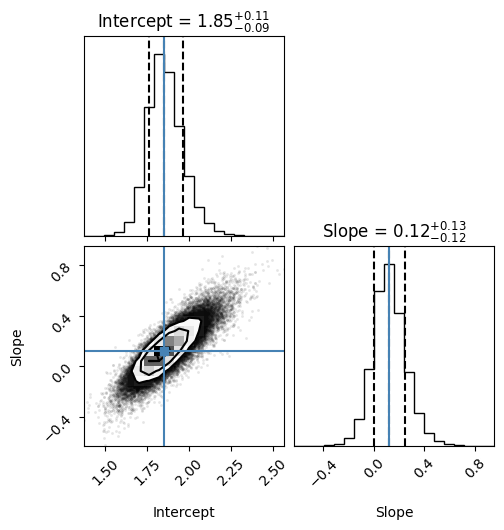

In [13]:
# Run Bayesian Regression
results = bayesian_regression_mcmc(
    x=df['x'].values, 
    y=df['y'].values, 
    x_err_lower=df['xerrl'].values / 1.645, 
    x_err_upper=df['xerru'].values / 1.645,
    y_err_lower=df['yerrl'].values / 1.645, 
    y_err_upper=df['yerru'].values / 1.645,
    x_upper_limits=None, 
    x_lower_limits=None, 
    y_upper_limits=None, 
    y_lower_limits=None,
    x_min=-2, x_max=0.5,
    num_realizations=100,
    sigma_intrinsic=0.0
)

results

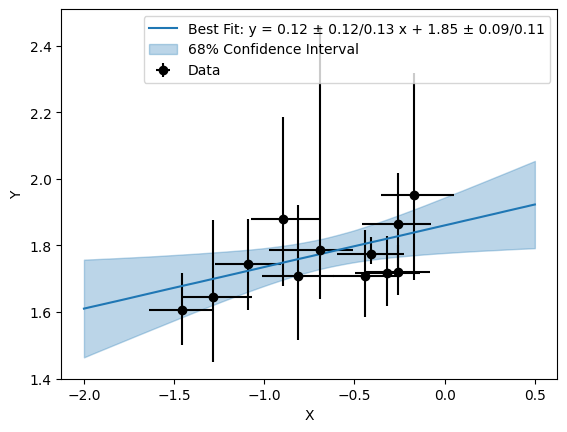

In [14]:
# Plot Results
fig, ax = plt.subplots()

# Scatter plot with asymmetric error bars
ax.errorbar(df['x'].values, df['y'].values, 
            yerr=[df['yerrl'].values, df['yerru'].values], 
            xerr=[df['xerrl'].values, df['xerru'].values], 
            fmt='o', label='Data', color='black')

# Best-fit line
ax.plot(results['x_plot'], results['y_median'], color='tab:blue', 
        label=f'Best Fit: y = {results["slope_median"]:.2f} ± {results["slope_err_lower"]:.2f}/{results["slope_err_upper"]:.2f} x + {results["intercept_median"]:.2f} ± {results["intercept_err_lower"]:.2f}/{results["intercept_err_upper"]:.2f}')

# 68% confidence interval
ax.fill_between(results['x_plot'], results['y_lower'], results['y_upper'], 
                color='tab:blue', alpha=0.3, label='68% Confidence Interval')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

Now with upper limits
These datapoints where generated with true_intercept = 2.0 and true_slope = 0.2 and perturbed

In [15]:
df = pd.read_csv('synthetic_dataset.csv', names=['x','y','yerrl','yerru','xerrl','xerru','y_upper_limit','y_lower_limit','x_upper_limit','x_lower_limit'], header=0)
df.head()

,x,y,yerrl,yerru,xerrl,xerru,y_upper_limit,y_lower_limit,x_upper_limit,x_lower_limit
0,-1.951632,1.624757,0.174908,0.393917,0.063543,0.206827,False,True,False,True
1,-1.831198,1.519871,0.290143,0.355027,0.175295,0.135587,False,False,False,False
2,-1.703017,1.661755,0.246399,0.387900,0.098117,0.148810,True,False,False,True
3,-1.602326,1.054004,0.219732,0.378965,0.077978,0.211974,False,False,False,False
4,-1.848131,1.615794,0.131204,0.319580,0.056116,0.197445,False,True,False,False


Running MCMC realizations: 100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


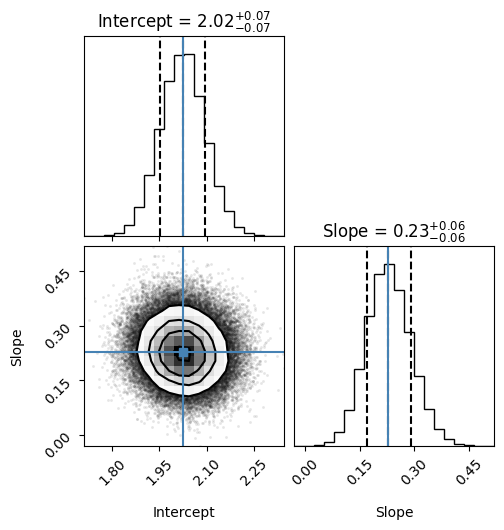

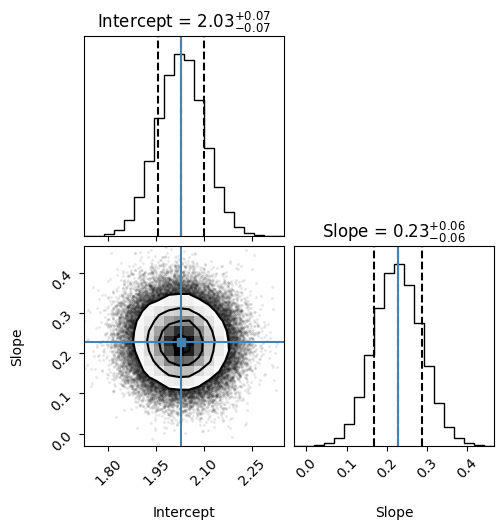

In [16]:
# Run Bayesian Regression
results_nolims = bayesian_regression_mcmc(
    x=df['x'].values, 
    y=df['y'].values, 
    x_err_lower=df['xerrl'].values, 
    x_err_upper=df['xerru'].values,
    y_err_lower=df['yerrl'].values, 
    y_err_upper=df['yerru'].values,
    x_upper_limits=None,
    x_lower_limits=None,
    y_upper_limits=None,
    y_lower_limits=None,
    x_min=-2, x_max=2.4,
    num_realizations=100,
    sigma_intrinsic=0.0
)

results_lims = bayesian_regression_mcmc(
    x=df['x'].values, 
    y=df['y'].values, 
    x_err_lower=df['xerrl'].values, 
    x_err_upper=df['xerru'].values,
    y_err_lower=df['yerrl'].values, 
    y_err_upper=df['yerru'].values,
    x_upper_limits=df['x_upper_limit'].values, 
    x_lower_limits=df['x_lower_limit'].values, 
    y_upper_limits=df['y_upper_limit'].values, 
    y_lower_limits=df['y_lower_limit'].values,
    x_min=-2, x_max=2.4,
    num_realizations=100,
    sigma_intrinsic=0.0
)

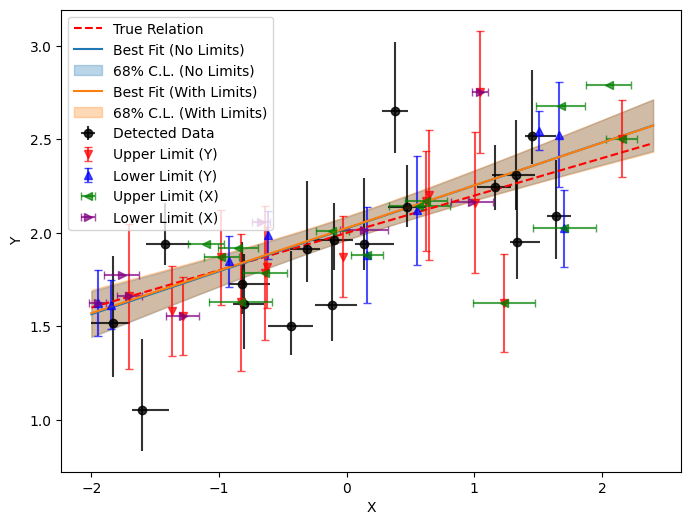

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

# Scatter plot with asymmetric error bars for detected points (No limits)
detected_mask = ~(df['y_upper_limit'] | df['y_lower_limit'] | df['x_upper_limit'] | df['x_lower_limit'])
ax.errorbar(df.loc[detected_mask, 'x'], df.loc[detected_mask, 'y'], 
            yerr=[df.loc[detected_mask, 'yerrl'], df.loc[detected_mask, 'yerru']], 
            xerr=[df.loc[detected_mask, 'xerrl'], df.loc[detected_mask, 'xerru']], 
            fmt='o', label='Detected Data', color='black', alpha=0.8)

# Upper limits in Y (downward arrows)
upper_y_mask = df['y_upper_limit']
ax.errorbar(df.loc[upper_y_mask, 'x'], df.loc[upper_y_mask, 'y'], 
            yerr=df.loc[upper_y_mask, 'yerru'], fmt='v', color='red', label='Upper Limit (Y)', capsize=3, alpha=0.7)

# Lower limits in Y (upward arrows)
lower_y_mask = df['y_lower_limit']
ax.errorbar(df.loc[lower_y_mask, 'x'], df.loc[lower_y_mask, 'y'], 
            yerr=df.loc[lower_y_mask, 'yerrl'], fmt='^', color='blue', label='Lower Limit (Y)', capsize=3, alpha=0.7)

# Upper limits in X (leftward arrows)
upper_x_mask = df['x_upper_limit']
ax.errorbar(df.loc[upper_x_mask, 'x'], df.loc[upper_x_mask, 'y'], 
            xerr=df.loc[upper_x_mask, 'xerru'], fmt='<', color='green', label='Upper Limit (X)', capsize=3, alpha=0.7)

# Lower limits in X (rightward arrows)
lower_x_mask = df['x_lower_limit']
ax.errorbar(df.loc[lower_x_mask, 'x'], df.loc[lower_x_mask, 'y'], 
            xerr=df.loc[lower_x_mask, 'xerrl'], fmt='>', color='purple', label='Lower Limit (X)', capsize=3, alpha=0.7)


# True Line
x_plot = np.linspace(-2,2.4,100)
m_truth, q_truth = 0.2, 2.0
ax.plot(x_plot, x_plot * m_truth + q_truth, color='r', linestyle="dashed", label='True Relation')

# Best-fit without limits
ax.plot(results_nolims['x_plot'], results_nolims['y_median'], color='tab:blue', linestyle="-", label='Best Fit (No Limits)')
ax.fill_between(results_nolims['x_plot'], results_nolims['y_lower'], results_nolims['y_upper'], 
                color='tab:blue', alpha=0.3, label='68% C.L. (No Limits)')

# Best-fit with limits
ax.plot(results_lims['x_plot'], results_lims['y_median'], color='tab:orange', linestyle="-", label='Best Fit (With Limits)')
ax.fill_between(results_lims['x_plot'], results_lims['y_lower'], results_lims['y_upper'], 
                color='tab:orange', alpha=0.3, label='68% C.L. (With Limits)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()